In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
whitequality_data = pd.read_csv("/content/drive/MyDrive/winequality-white.csv")

In [ ]:
whitequality_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# 刪除空白植跟不必要欄位


In [ ]:
whitequality_data.isnull().any()#無缺失值

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [ ]:
whitequality_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# 觀察特徵值

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Y=whitequality_data["quality"]
df=whitequality_data.drop(['quality'], axis=1)

model_Forest = RandomForestRegressor(random_state=1, max_depth=10)
model_Forest.fit(df,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

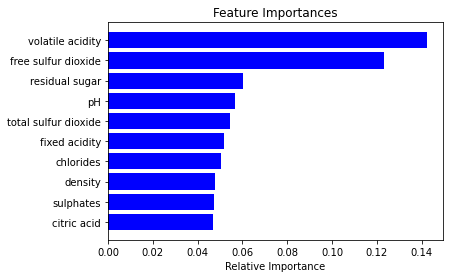

In [ ]:
features = df.columns
importances = model_Forest.feature_importances_
indices = np.argsort(importances[0:10])  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#資料平衡

In [ ]:
whitequality_data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler  
X = whitequality_data.iloc[:,0:11].values 
y= whitequality_data['quality'].values  
ros = RandomOverSampler()  
X,y = ros.fit_sample(X,y)  
print(pd.DataFrame(y)[0].value_counts().sort_index())  

3    2198
4    2198
5    2198
6    2198
7    2198
8    2198
9    2198
Name: 0, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# 標準化

In [ ]:
#標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaler = scaler.transform(X)

In [ ]:
#Y值修改
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y[:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

# 分割資料集

In [ ]:
#預測數值資料集
res_X_train, res_X_test, res_y_train, res_y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=0)

In [ ]:
#分類數值資料集
X_train, X_test, y_train, y_test = train_test_split(X_scaler,Y,test_size=0.2,random_state=0)

# 預測數值


In [ ]:
from keras import models
from keras import layers
from keras.optimizers import RMSprop

In [ ]:
#build_model
#調整不同的lr
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(11,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1))
rmsprop = RMSprop(lr=0.002)
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
model.fit(res_X_train,res_y_train,epochs=80,batch_size=16,verbose=0)
test_mse,test_mae = model.evaluate(res_X_test,res_y_test)

97/97 [==============================] - 0s 875us/step - loss: 0.3268 - mae: 0.4186


In [ ]:
res_y_pred = model.predict(res_X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
#mape
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(res_y_test, res_y_pred)
print(mape)

46.555731980796864


In [ ]:
#rmse
RMSE = math.sqrt(test_mse)
RMSE

0.5716611514460304

In [ ]:
#模型
model.summary()

Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_339 (Dense)            (None, 64)                768       
_________________________________________________________________
dense_340 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_341 (Dense)            (None, 1)                 129       
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


# 分類

In [ ]:
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(500, input_dim=11, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(7, activation='softmax'))
rmsprop = RMSprop(lr=0.002)
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train,validation_data  = (X_test,y_test), epochs=8, batch_size=16)

Epoch 1/8
770/770 [==============================] - 6s 7ms/step - loss: 1.2892 - accuracy: 0.4968 - val_loss: 0.8473 - val_accuracy: 0.6449
Epoch 2/8
770/770 [==============================] - 5s 6ms/step - loss: 0.8154 - accuracy: 0.6529 - val_loss: 0.7491 - val_accuracy: 0.6806
Epoch 3/8
770/770 [==============================] - 5s 6ms/step - loss: 0.7151 - accuracy: 0.6978 - val_loss: 0.6874 - val_accuracy: 0.7190
Epoch 4/8
770/770 [==============================] - 5s 6ms/step - loss: 0.6501 - accuracy: 0.7316 - val_loss: 0.6325 - val_accuracy: 0.7476
Epoch 5/8
770/770 [==============================] - 5s 6ms/step - loss: 0.5817 - accuracy: 0.7604 - val_loss: 0.5432 - val_accuracy: 0.7791
Epoch 6/8
770/770 [==============================] - 5s 6ms/step - loss: 0.5441 - accuracy: 0.7795 - val_loss: 0.5111 - val_accuracy: 0.7934
Epoch 7/8
770/770 [==============================] - 5s 6ms/step - loss: 0.4884 - accuracy: 0.8017 - val_loss: 0.5046 - val_accuracy: 0.7973
Epoch 8/8
770

In [ ]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       447
           1       0.85      0.96      0.90       438
           2       0.65      0.69      0.67       407
           3       0.54      0.30      0.39       442
           4       0.68      0.73      0.70       453
           5       0.86      0.98      0.91       460
           6       1.00      1.00      1.00       431

    accuracy                           0.81      3078
   macro avg       0.79      0.81      0.79      3078
weighted avg       0.79      0.81      0.80      3078

[[447   0   0   0   0   0   0]
 [  0 421  17   0   0   0   0]
 [  5  43 282  61  15   1   0]
 [  5  18 117 134 132  35   1]
 [  1  11  19  52 330  39   1]
 [  0   0   0   0  10 450   0]
 [  0   0   0   0   0   0 431]]


In [ ]:
score = model.evaluate(X_test,y_test)
print(score)

97/97 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.8106
[0.46255603432655334, 0.8105912804603577]
